<a href="https://colab.research.google.com/github/Rahul-Tanawade/Machine-learning/blob/main/Naives_bayes%20implementation%20with%20Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem

Bayes Theorem can be used to calculate conditional probability


It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

These classifiers assume that the value of a particular feature is independent of the value of any other feature.


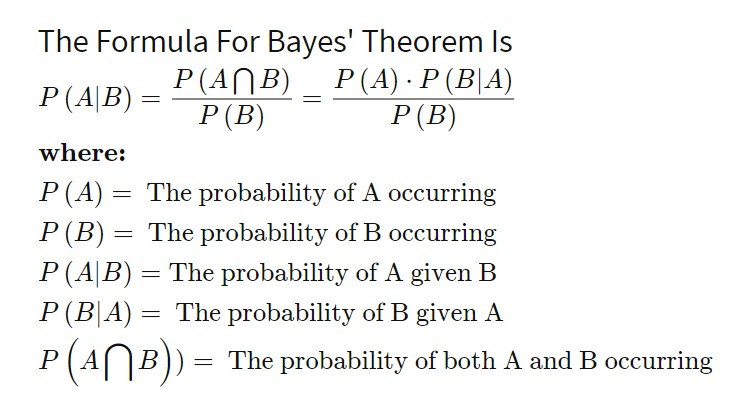

When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution

In [79]:
#aim is classification using Naive bayes .
#data set has features (age, estimated salary) and using this prediction to be made if car will be purchased or not
from google.colab import files
uploaded=files.upload()

import io
import pandas as pd
dataset = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [105]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [124]:
X=dataset.loc[:,['Age','EstimatedSalary']]
y=dataset.loc[:,['Purchased']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [125]:
y_test.index

Int64Index([132, 309, 341, 196, 246,  60, 155, 261, 141, 214,  37, 134, 113,
            348,  12,  59, 293, 140, 206, 199, 176, 268, 124, 344, 175, 313,
             78,  15, 286, 102, 170, 303, 334, 225,  65,  76,  90, 173, 179,
            399, 100, 322,   6,   1, 297,  54, 374, 255, 158, 233, 247, 144,
            294, 171, 280, 318,  52,  10,  26,  45,  74, 272,   4, 354, 191,
            371, 145,   5, 154, 310,   7, 260,  68,  20, 107,  14, 363, 304,
            361, 329, 336,  64,  55, 106, 300, 229, 122, 373, 395, 325, 380,
            253,  56,   8, 190, 146, 135, 390, 264, 364],
           dtype='int64')

Standard Naive Bayes only supports categorical features, while Gaussian Naive Bayes only supports continuously valued features. If your data set's features are categorical, standard Naive Bayes is the better choice. If your data set's features are continuous, Gaussian Naive Bayes may be better. If your data set contains both categorical and continuous features, you have two options. You can either discretize your continuous features via bucketing or a similar methodology, or you can use a hybrid Naive Bayes model.

In [126]:
#fit using naive bayes model
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

checking test set results


In [127]:
y_pred=classifier.predict(X_test)

In [128]:
print(y_pred) #finding the y_pred

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [129]:
print(y_test['Purchased'].values)#checking for y_test

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9


In [131]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


checking for all incorrect predictions made


In [132]:
import numpy as np
print(y_pred.shape)
print(y_test['Purchased'].values.shape)

#checking for all points where results are incorrect
incorrect=np.where(np.not_equal(y_pred, y_test['Purchased'].values)) #The numpy.where() function returns the indices of elements in an input array where the given condition is satisfied.


(100,)
(100,)


In [133]:
print(incorrect[0].tolist())


print(y_test.iloc[incorrect[0].tolist(),:]) #all incorrect prediction observations

#trace them back in  dataset 

[9, 31, 53, 55, 63, 73, 81, 85, 88, 95]
     Purchased
214          0
303          1
171          0
318          1
354          1
20           1
64           0
229          1
395          1
146          1


In [134]:
#below are all incorect predictions
inc_dataset=dataset.loc[y_test.iloc[incorrect[0].tolist(),:].index,:]
print(inc_dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
214  15622478    Male   47            43000          0
303  15637593    Male   37            79000          1
171  15570932    Male   34           115000          0
318  15742204    Male   45            32000          1
354  15699619    Male   36            99000          1
20   15649487    Male   45            22000          1
64   15605000  Female   59            83000          0
229  15721007  Female   42            80000          1
395  15691863  Female   46            41000          1
146  15750839  Female   27            96000          1


In [135]:
print(classifier.classes_) #classes 

#predict_proba  Returns the probability of the samples for each class in the model. The columns correspond to the classes in sorted order, as they appear in the attribute classes_.

classifier.predict_proba(inc_dataset.loc[:,['Age','EstimatedSalary']])# finding probability of classification for incorrect classification

#as seen below for 1st observation above , actual purchased='0' which is incorrectly classified
#probabilty are [0.49359778, 0.50640222], which means 49% for class 0 and 50% for class 1, hence its classified as class 1 

[0 1]


array([[0.49359778, 0.50640222],
       [0.79012835, 0.20987165],
       [0.46939763, 0.53060237],
       [0.56406961, 0.43593039],
       [0.6419403 , 0.3580597 ],
       [0.50911276, 0.49088724],
       [0.03437128, 0.96562872],
       [0.5923479 , 0.4076521 ],
       [0.5409889 , 0.4590111 ],
       [0.90153526, 0.09846474]])